In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture 10

## Exercise 10.1

In this exercise we want to implement a simulated annaeling algorithm to solve again the traveling salesman problem with the same set of cities of the last lecture and see if there are differences. The code is developed adapting the one already written for the last lecture.

In the process of generating a new path the same mutations as last time are attempted, with also the same probabilities of success. Obviously this time no crossover can occur as there is not a population of individuals, just a single path. Once a mutated (or not) new path is obtained, the probability of it being accepted as the new best path is $p=e^{-\beta \times (L^{(1)}_{new}-L^{(1)}_{old})}$ where $\beta=\frac{1}{T}$ with $T$ being the simulated temperature of the system. Note that if $L^{(1)}_{new}<L^{(1)}_{old}$ then $p>1$ so the new path is always accepted as the new best one. In order for the algorithm to eventually stick to an answer (refusing new paths), the temperature must be lowered during the simulation, but not to fast (in this case the algorithm would stop accepting new paths too early and could end up stuck on a sub-optimal path). In the simulation we will change $\beta$ every $300$ steps following this rule:
$$ \beta_{i+1}=k\beta_i$$
with $k=1.005$ and $\beta_0=0.08$. The simulation will run for $6\times10^5$ steps total, meaning that $\beta$ will change $2000$ times.

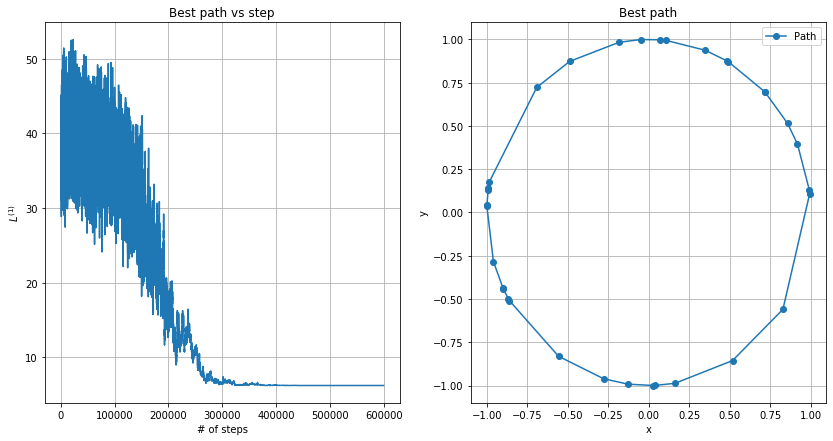

The best path found has length: 6.2403


In [2]:
c_best=np.loadtxt("circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("circle_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(figsize=(14,7))
c_gen=np.linspace(1,600000,600000)

plt.subplot(121)
plt.plot(c_gen,c_best)
plt.xlabel("# of steps")
plt.ylabel("$L^{(1)}$")
plt.title("Best path vs step")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Path')
plt.legend()
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("The best path found has length:", c_best[599999])

The algorithm is able to find (after about $400000$ steps) the same answer as the one obtained in lecture 09, which once again is obviously the best possible path. We can now try with the cities distribuited inside the square.

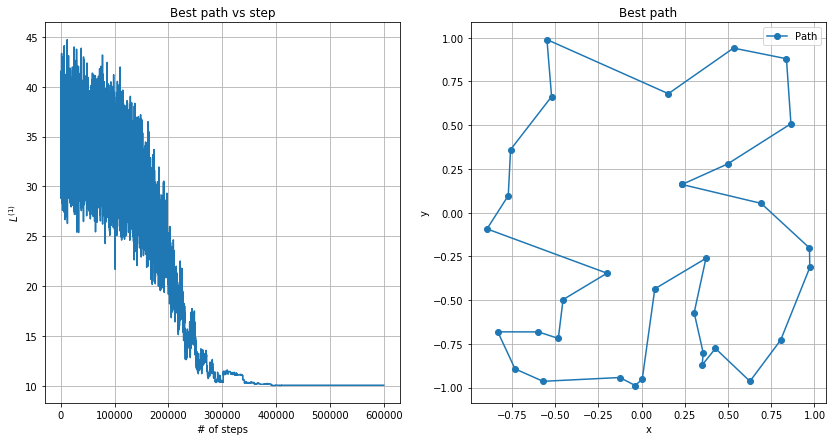

The best path found has length: 10.0462


In [3]:
s_best=np.loadtxt("square_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
s_x,s_y=np.loadtxt("square_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(figsize=(14,7))
s_gen=np.linspace(1,600000,600000)

plt.subplot(121)
plt.plot(s_gen,s_best)
plt.xlabel("# of steps")
plt.ylabel("$L^{(1)}$")
plt.title("Best path vs step")
plt.grid(True)

plt.subplot(122)
plt.plot(s_x,s_y,'-o',label='Path')
plt.legend()
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("The best path found has length:", s_best[599999])

This time the path found is different and slightly worse than the one found in the last lecture. The simulation also takes a bit more time than what it is needed by the GA algorithm (about $5$ seconds vs $3$ seconds) even though the same number of paths are generated, so overall in this case the genetic algorithm seems better. However the solution found by the simulated annealing algorithm is still very good, so changing some parameters could easily bring to the same answer as the genetic algorithm or even to a better one.

## Exercise 10.2

Now we try to run four instances of the genetic algorithm in parallel with the possibility of exchanging information (the best paths) between the nodes, to see if this approach does give better results. We use the same parameters as those described in the lecture 09, but run only $1000$ generations as we expect the convergence to an answer to be faster. The nodes will exchange paths once every $150$ generations. The code was first tested on the cities disposed on the circle and it managed to find the best possible path.

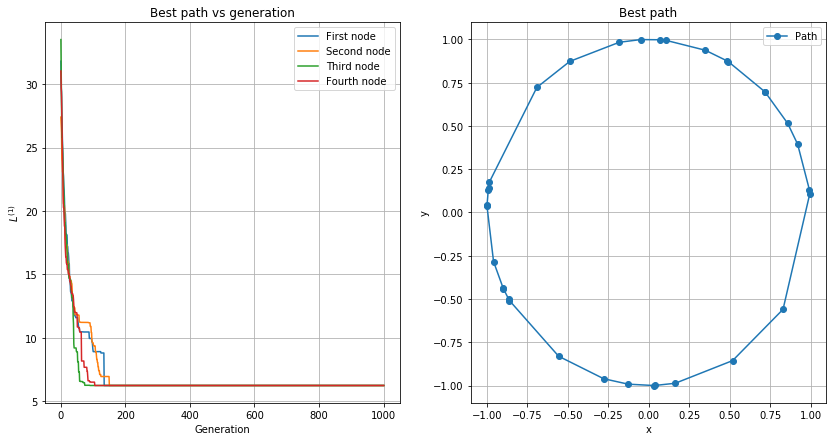

The best path found has length: 6.2403


In [4]:
c_best0=np.loadtxt("10_2/0_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_best1=np.loadtxt("10_2/1_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_best2=np.loadtxt("10_2/2_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_best3=np.loadtxt("10_2/3_circle_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("10_2/0_circle_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(figsize=(14,7))
c_gen=np.linspace(1,1000,1000)

plt.subplot(121)
plt.plot(c_gen,c_best0,label="First node")
plt.plot(c_gen,c_best1,label="Second node")
plt.plot(c_gen,c_best2,label="Third node")
plt.plot(c_gen,c_best3,label="Fourth node")
plt.title("Best path vs generation")
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Path')
plt.legend()
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("The best path found has length:",c_best0[999])

The path was found independently before $150$ generations by all nodes except the second one, that received it from another node during the first exchange at $150$ generations.

We can now try to apply the code to the cities inside a square.

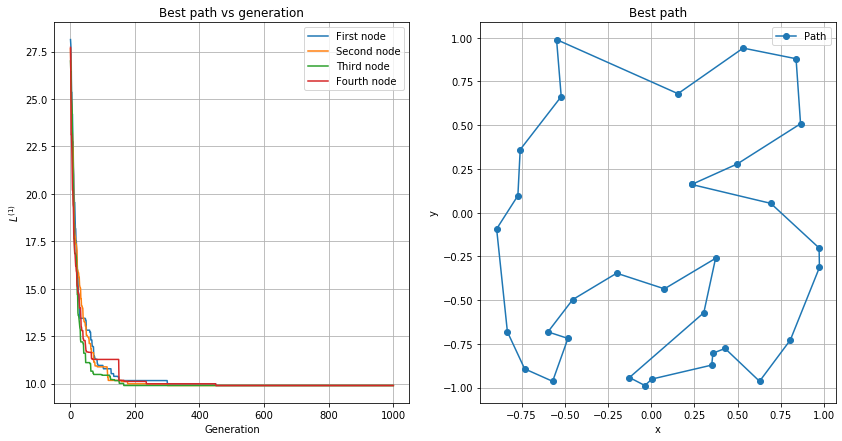

The best path found has length: 9.8983


In [5]:
s_best0=np.loadtxt("10_2/0_square_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
s_best1=np.loadtxt("10_2/1_square_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
s_best2=np.loadtxt("10_2/2_square_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
s_best3=np.loadtxt("10_2/3_square_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
s_x,s_y=np.loadtxt("10_2/0_square_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(figsize=(14,7))
s_gen=np.linspace(1,1000,1000)

plt.subplot(121)
plt.plot(s_gen,s_best0,label="First node")
plt.plot(s_gen,s_best1,label="Second node")
plt.plot(s_gen,s_best2,label="Third node")
plt.plot(s_gen,s_best3,label="Fourth node")
plt.title("Best path vs generation")
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(s_x,s_y,'-o',label='Path')
plt.legend()
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("The best path found has length:",s_best0[999])

The path found is the same as the one in lecture 09. This time it was first found by the third node some generations after the first exchange between nodes, then it reached the second node during the second exchange at $300$ generations and at last both first and fourth nodes during the third exchange at $450$ generations.

Running the four simulations in parallel on my machine took around $5$ seconds, meaning that it was actually faster than running four separate instances of the code used in the lecture 09. Having also found the same result in much less generations, it seems like parallel computing is a better option to find the solution of the problem.